# Визуализация графиков

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_graphs = '../graphs/'
is_save_graph = False

df_data = pd.read_pickle('../data/df_data.pkl')
display(df_data.head(), df_data.tail())

# Пригодится позже №1
# Для графиков синусойд
df_sin = df_data.copy(deep=True)
sin_base = np.sin(np.arange(0, np.pi*2, np.pi*2/12)) * 1.5*10**4
df_sin['metrics1'] = np.concatenate([sin_base + i*10**4 for i in range(6,12)])

# Пригодится позже №2
# Для графиков с предположением, что 2011 год — прогноз
df_predict = df_data.copy(deep=True) 
df_predict['year'] = df_predict['year'].apply(lambda x: f'{x} прогноз' if x == 2011 else f'{x} факт')

# Пригодится позже №3
# Для графиков, предложенных вместо 3Д визуализаций
df_data3d = pd.concat([df_data.iloc[:, 2:], df_data.iloc[:, 2:]*1.01, df_data.iloc[:, 2:]*1.05], axis=0)

,year,month,metrics1,metrics2,metrics3
year_month,,,,,
2006-01,2006,1,78272,151389,82232352
2006-02,2006,2,61767,161791,74826757
2006-03,2006,3,53722,138234,79308677
2006-04,2006,4,56552,149523,63690955
2006-05,2006,5,63705,147405,93380501


,year,month,metrics1,metrics2,metrics3
year_month,,,,,
2011-08,2011,8,122528,844749,135341891
2011-09,2011,9,83564,473934,143959491
2011-10,2011,10,83914,610372,128564459
2011-11,2011,11,84743,486911,127094463
2011-12,2011,12,90023,630901,115593907


## База

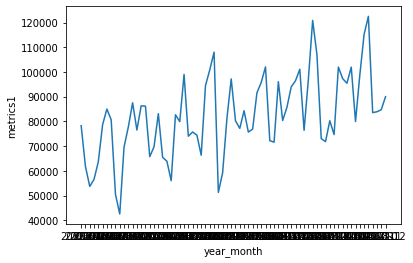

In [2]:
sns.lineplot(data=df_data, x=df_data.index, y='metrics1') # Отрисуем график

if is_save_graph: plt.savefig(f'{path_graphs}plot_base.png') # Сохраним график

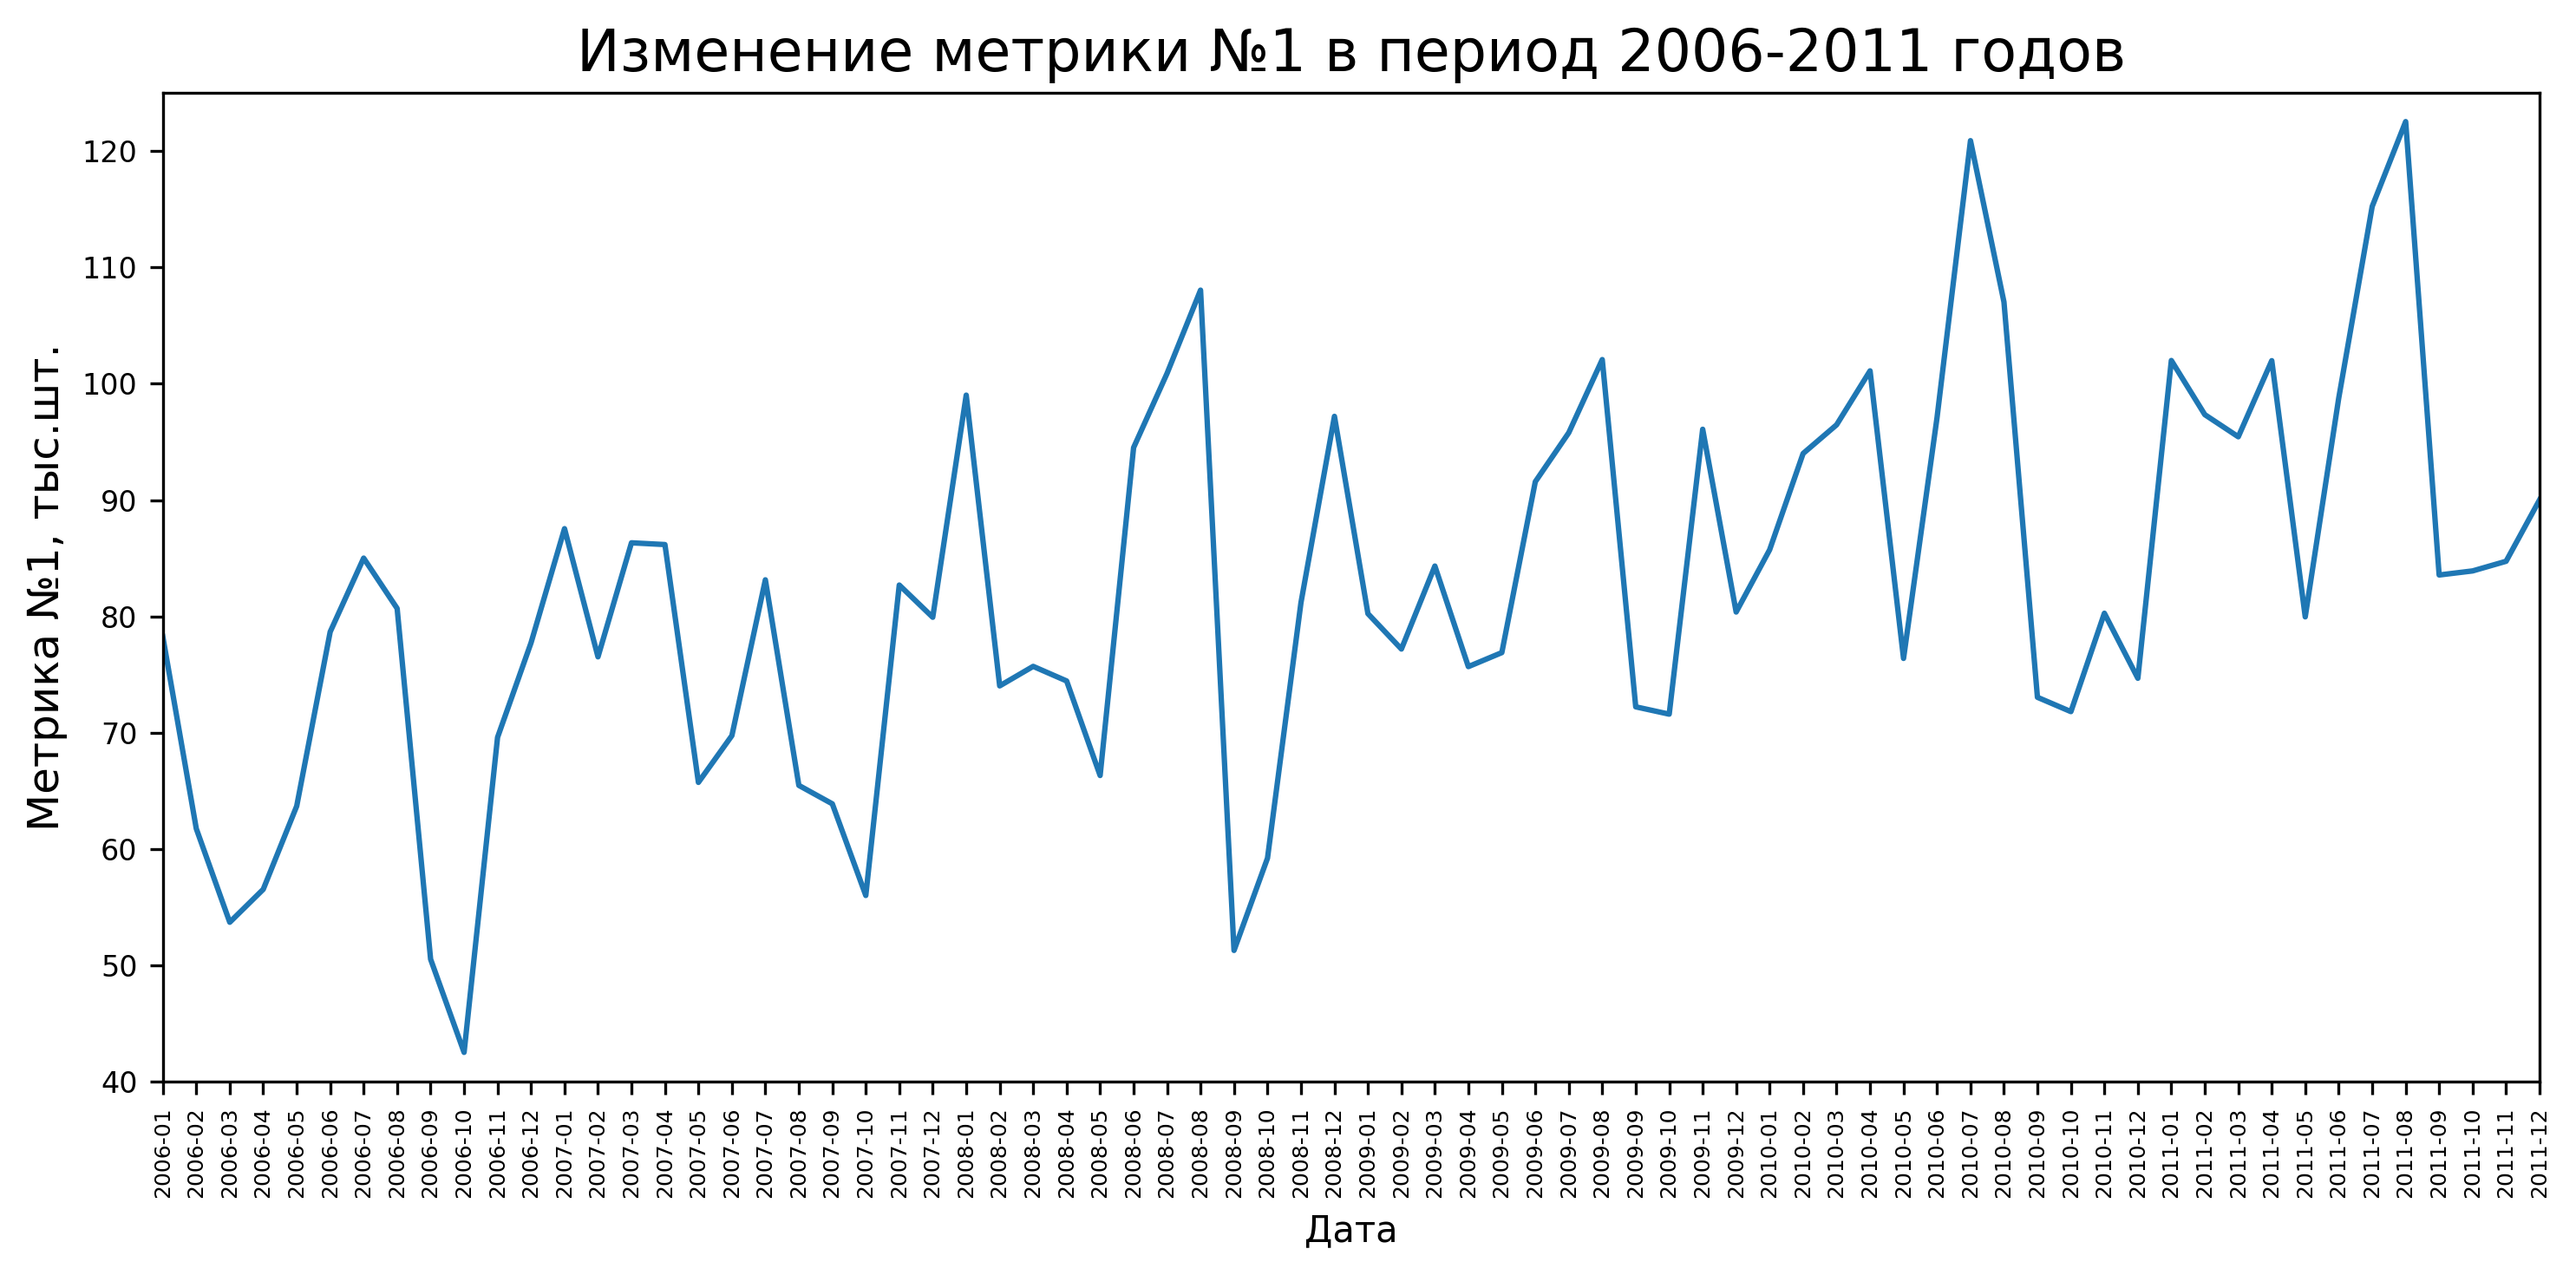

In [3]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_data, x=df_data.index, y='metrics1') # Отрисуем график

plt.xticks(rotation=90, fontsize=6) # Повернем подписи делений оси абсцисс
plt.xlim(0, len(df_data)-1) # Ограничим ось абсцисс
plt.xlabel('Дата', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи оси ординат
plt.ylim(4*10**4, 12.5*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_base_advanced.png') # Сохраним график

## У вас есть только 10 секунд

### Немного о hue

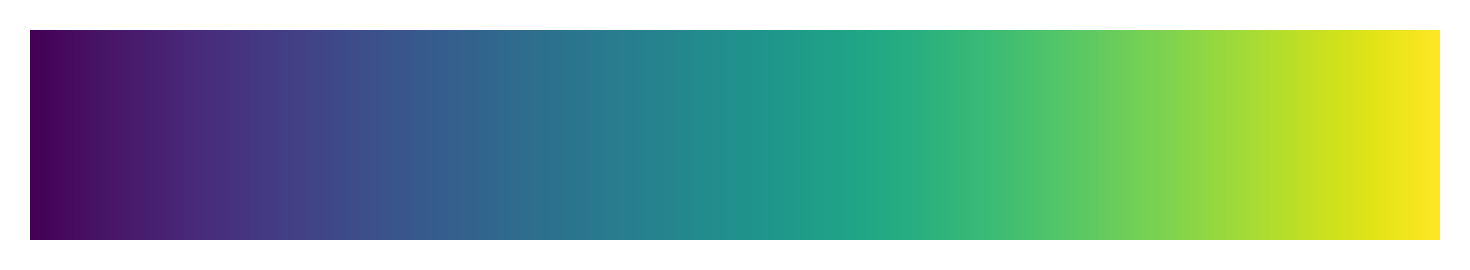

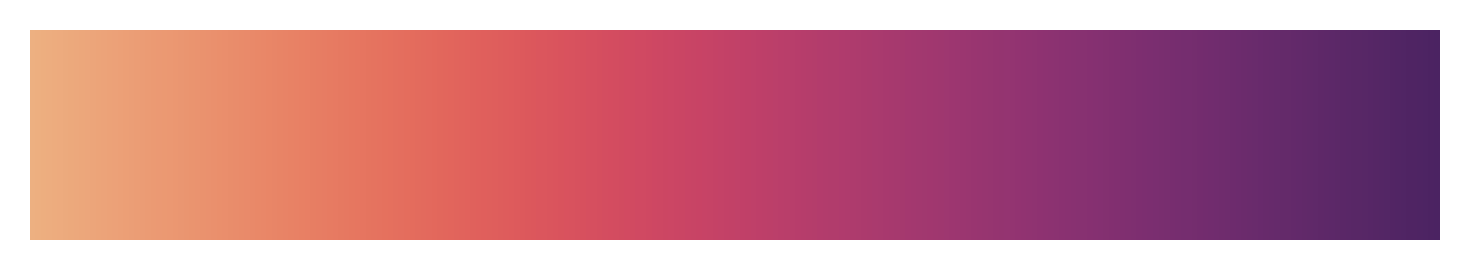

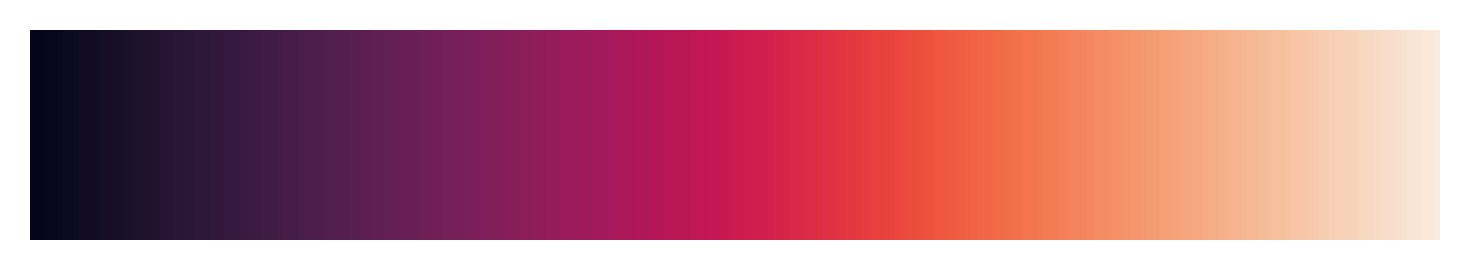

In [4]:
for palette in ('viridis', 'flare', 'rocket'):
    plt.figure(figsize=(5,1), dpi=300)
    sns.heatmap(data=[range(10**4)], cbar=False, cmap=palette)
    plt.axis('off')
    plt.tight_layout()
    if is_save_graph: plt.savefig(f'{path_graphs}plot_palette_{palette}_1.png') # Сохраним график

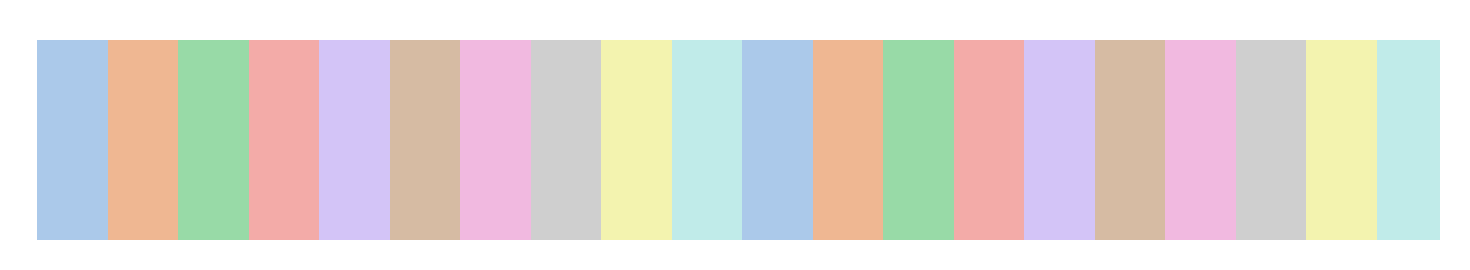

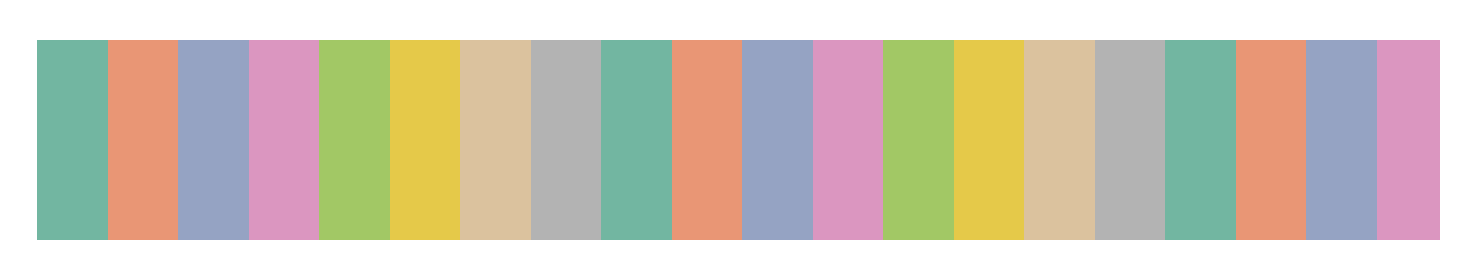

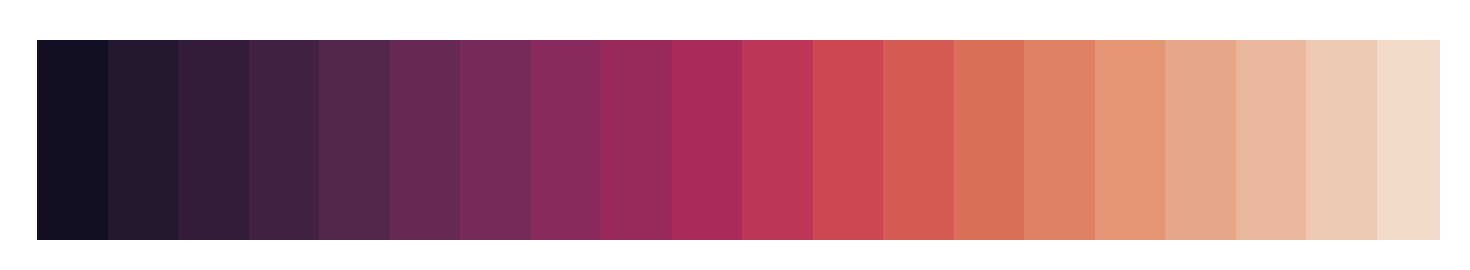

In [5]:
for palette in ('pastel', 'Set2', 'rocket'):
    plt.figure(figsize=(5,1), dpi=300)
    sns.barplot(data=[[1]]*20, palette=palette)
    for w in plt.gca().patches:
        w.set_width(1)
    plt.axis('off')
    plt.tight_layout()
    if is_save_graph: plt.savefig(f'{path_graphs}plot_palette_{palette}_2.png') # Сохраним график

### Градиентная палитра

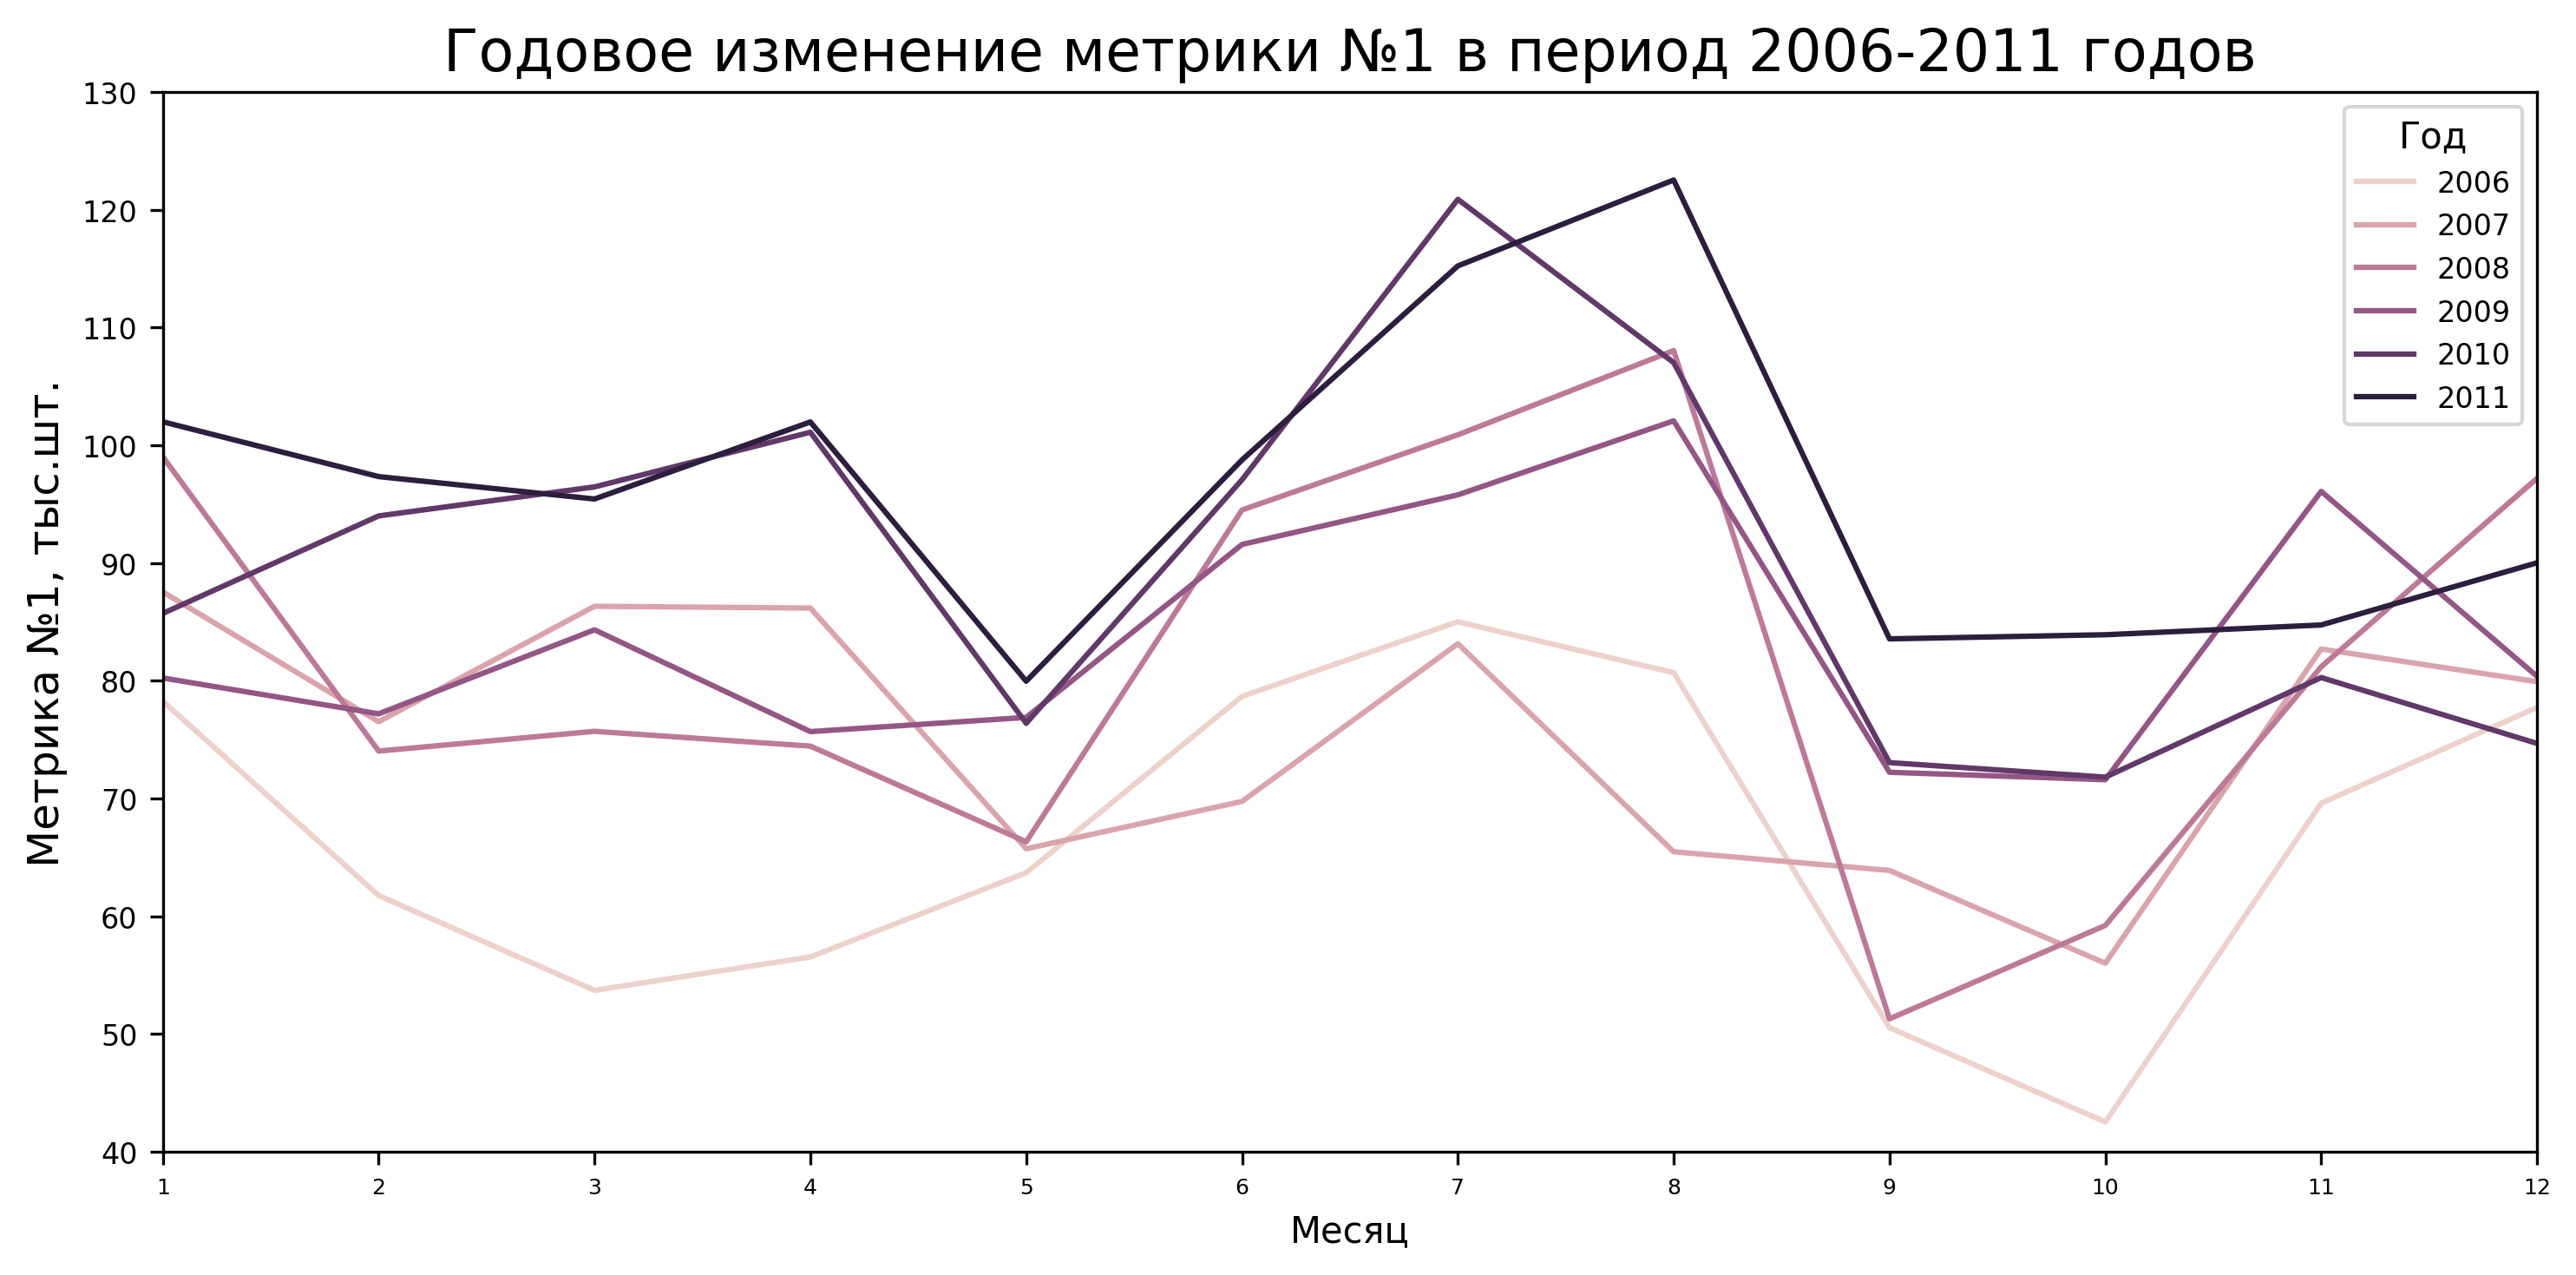

In [6]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_data, x='month', y='metrics1', hue='year') # Отрисуем график

x_unique = df_data.month.unique()
plt.xticks(ticks=x_unique, fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(x_unique.min(), x_unique.max()) # Ограничим ось абсцисс
plt.xlabel('Месяц', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.legend(title='Год', loc='upper right', fontsize=8) # Укажем название и положение легенды
plt.title('Годовое изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_gradient.png') # Сохраним график

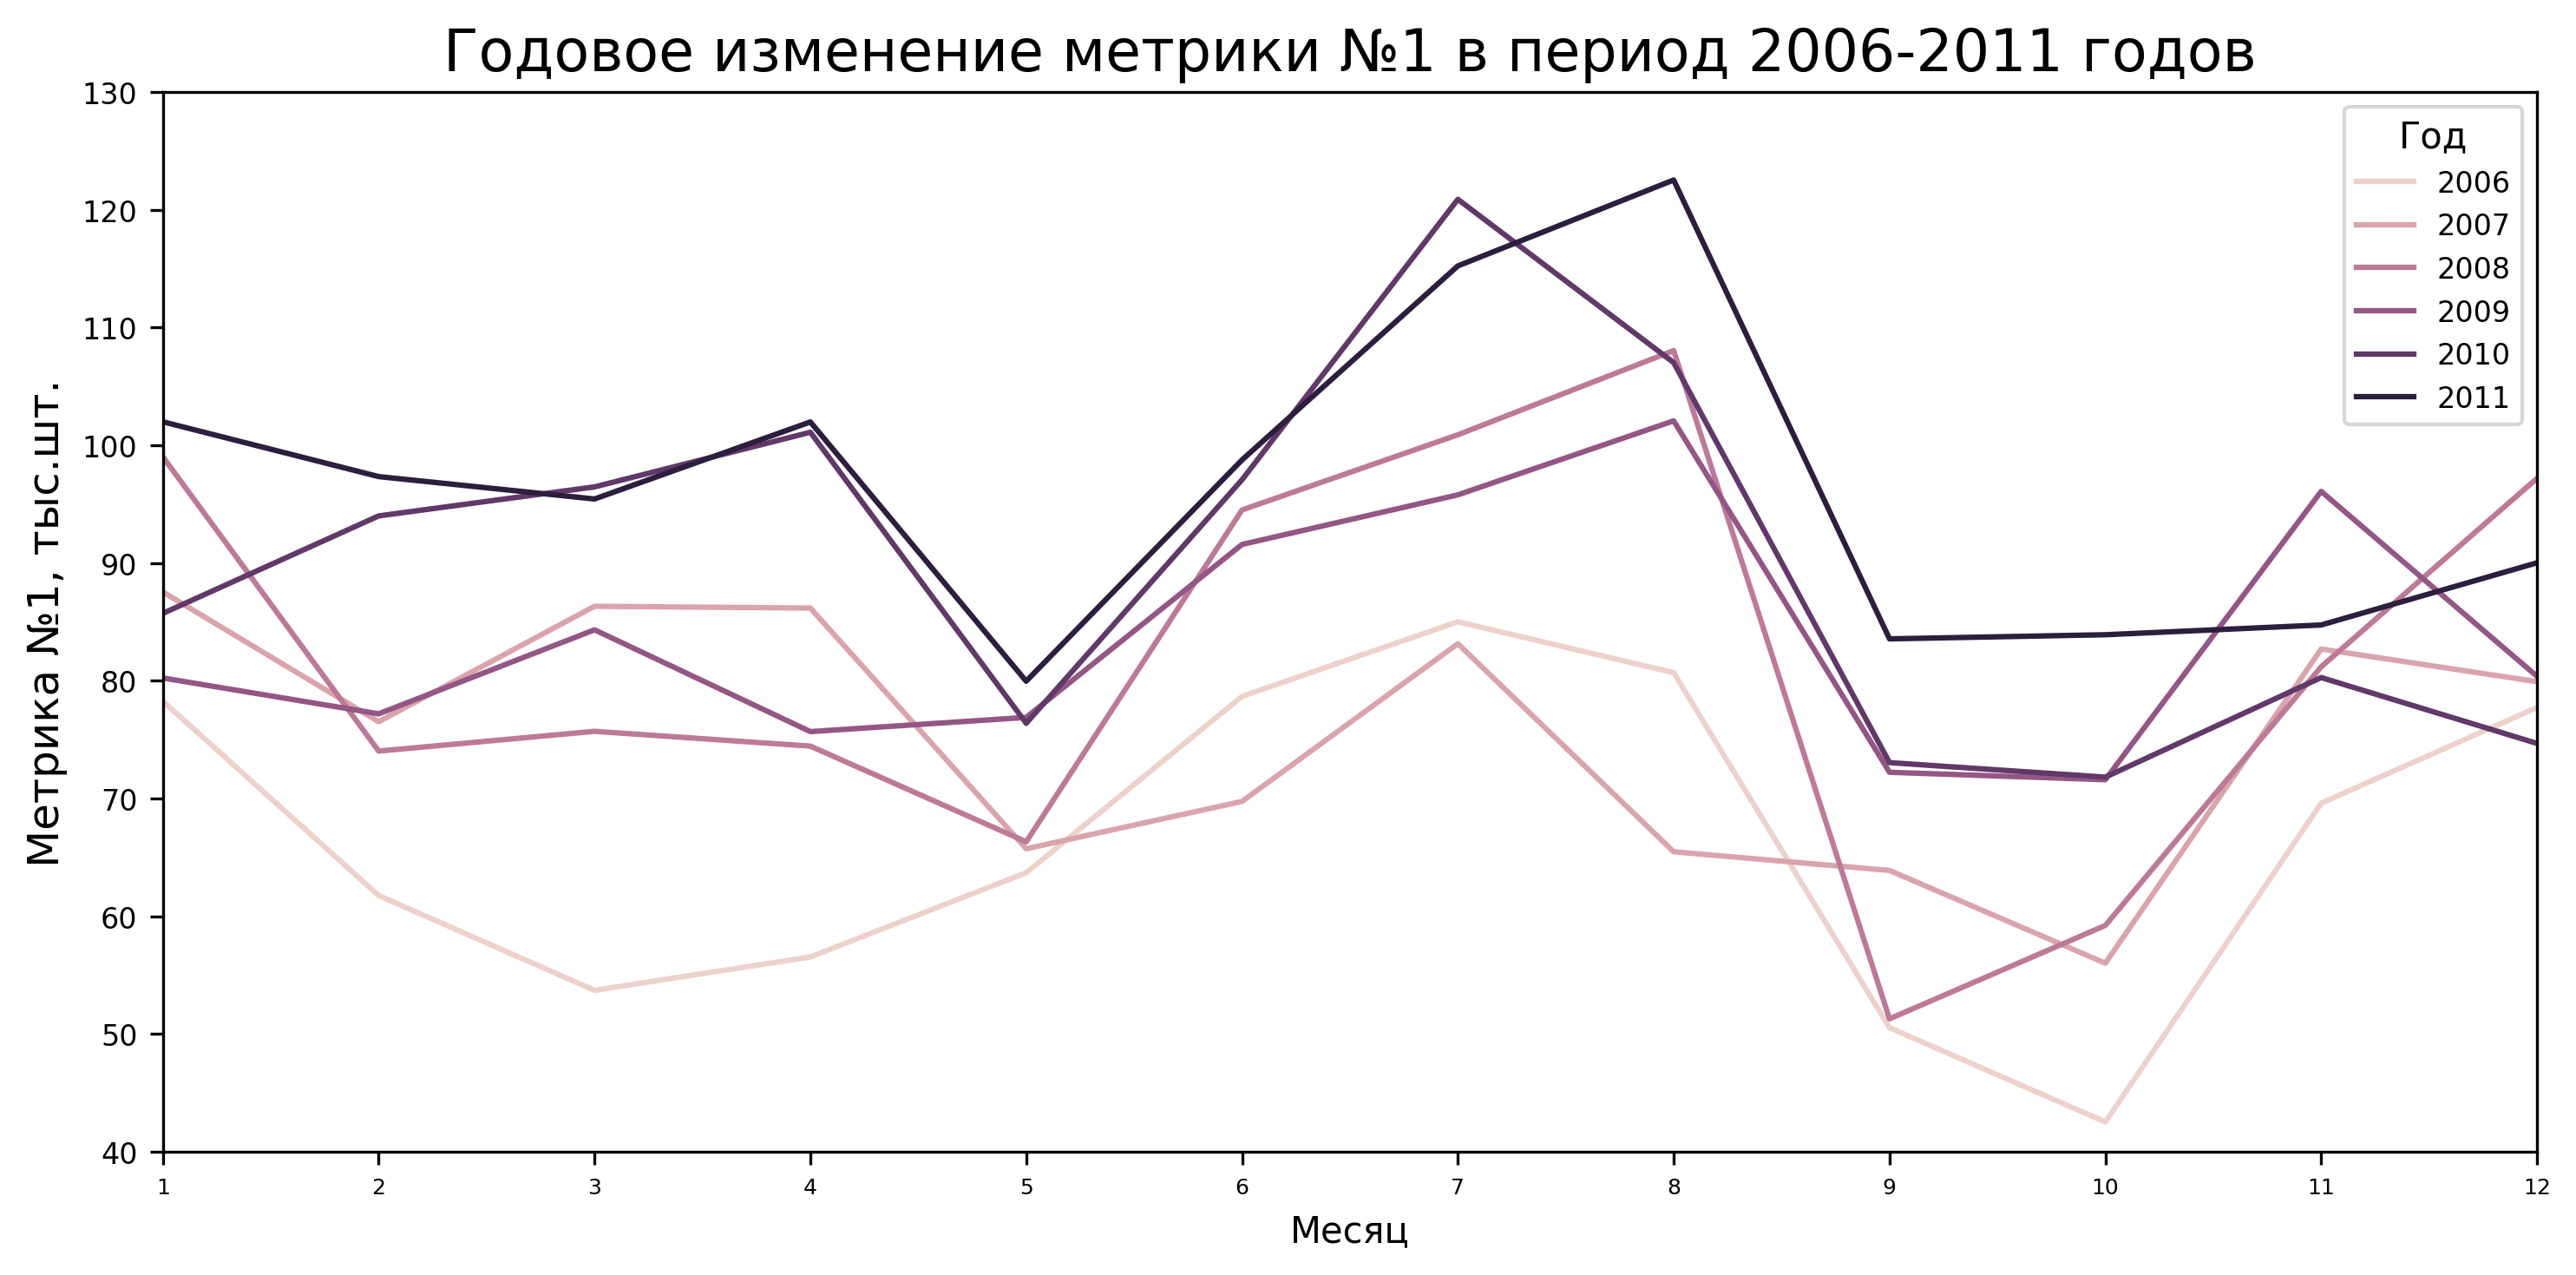

In [7]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_data, x='month', y='metrics1', hue='year', hue_order=df_data.year.unique()[::-1]) # Отрисуем график

x_unique = df_data.month.unique()
plt.xticks(ticks=x_unique, fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(x_unique.min(), x_unique.max()) # Ограничим ось абсцисс
plt.xlabel('Месяц', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.legend(title='Год', loc='upper right', fontsize=8) # Укажем название и положение легенды
plt.title('Годовое изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_gradient_test.png') # Сохраним график

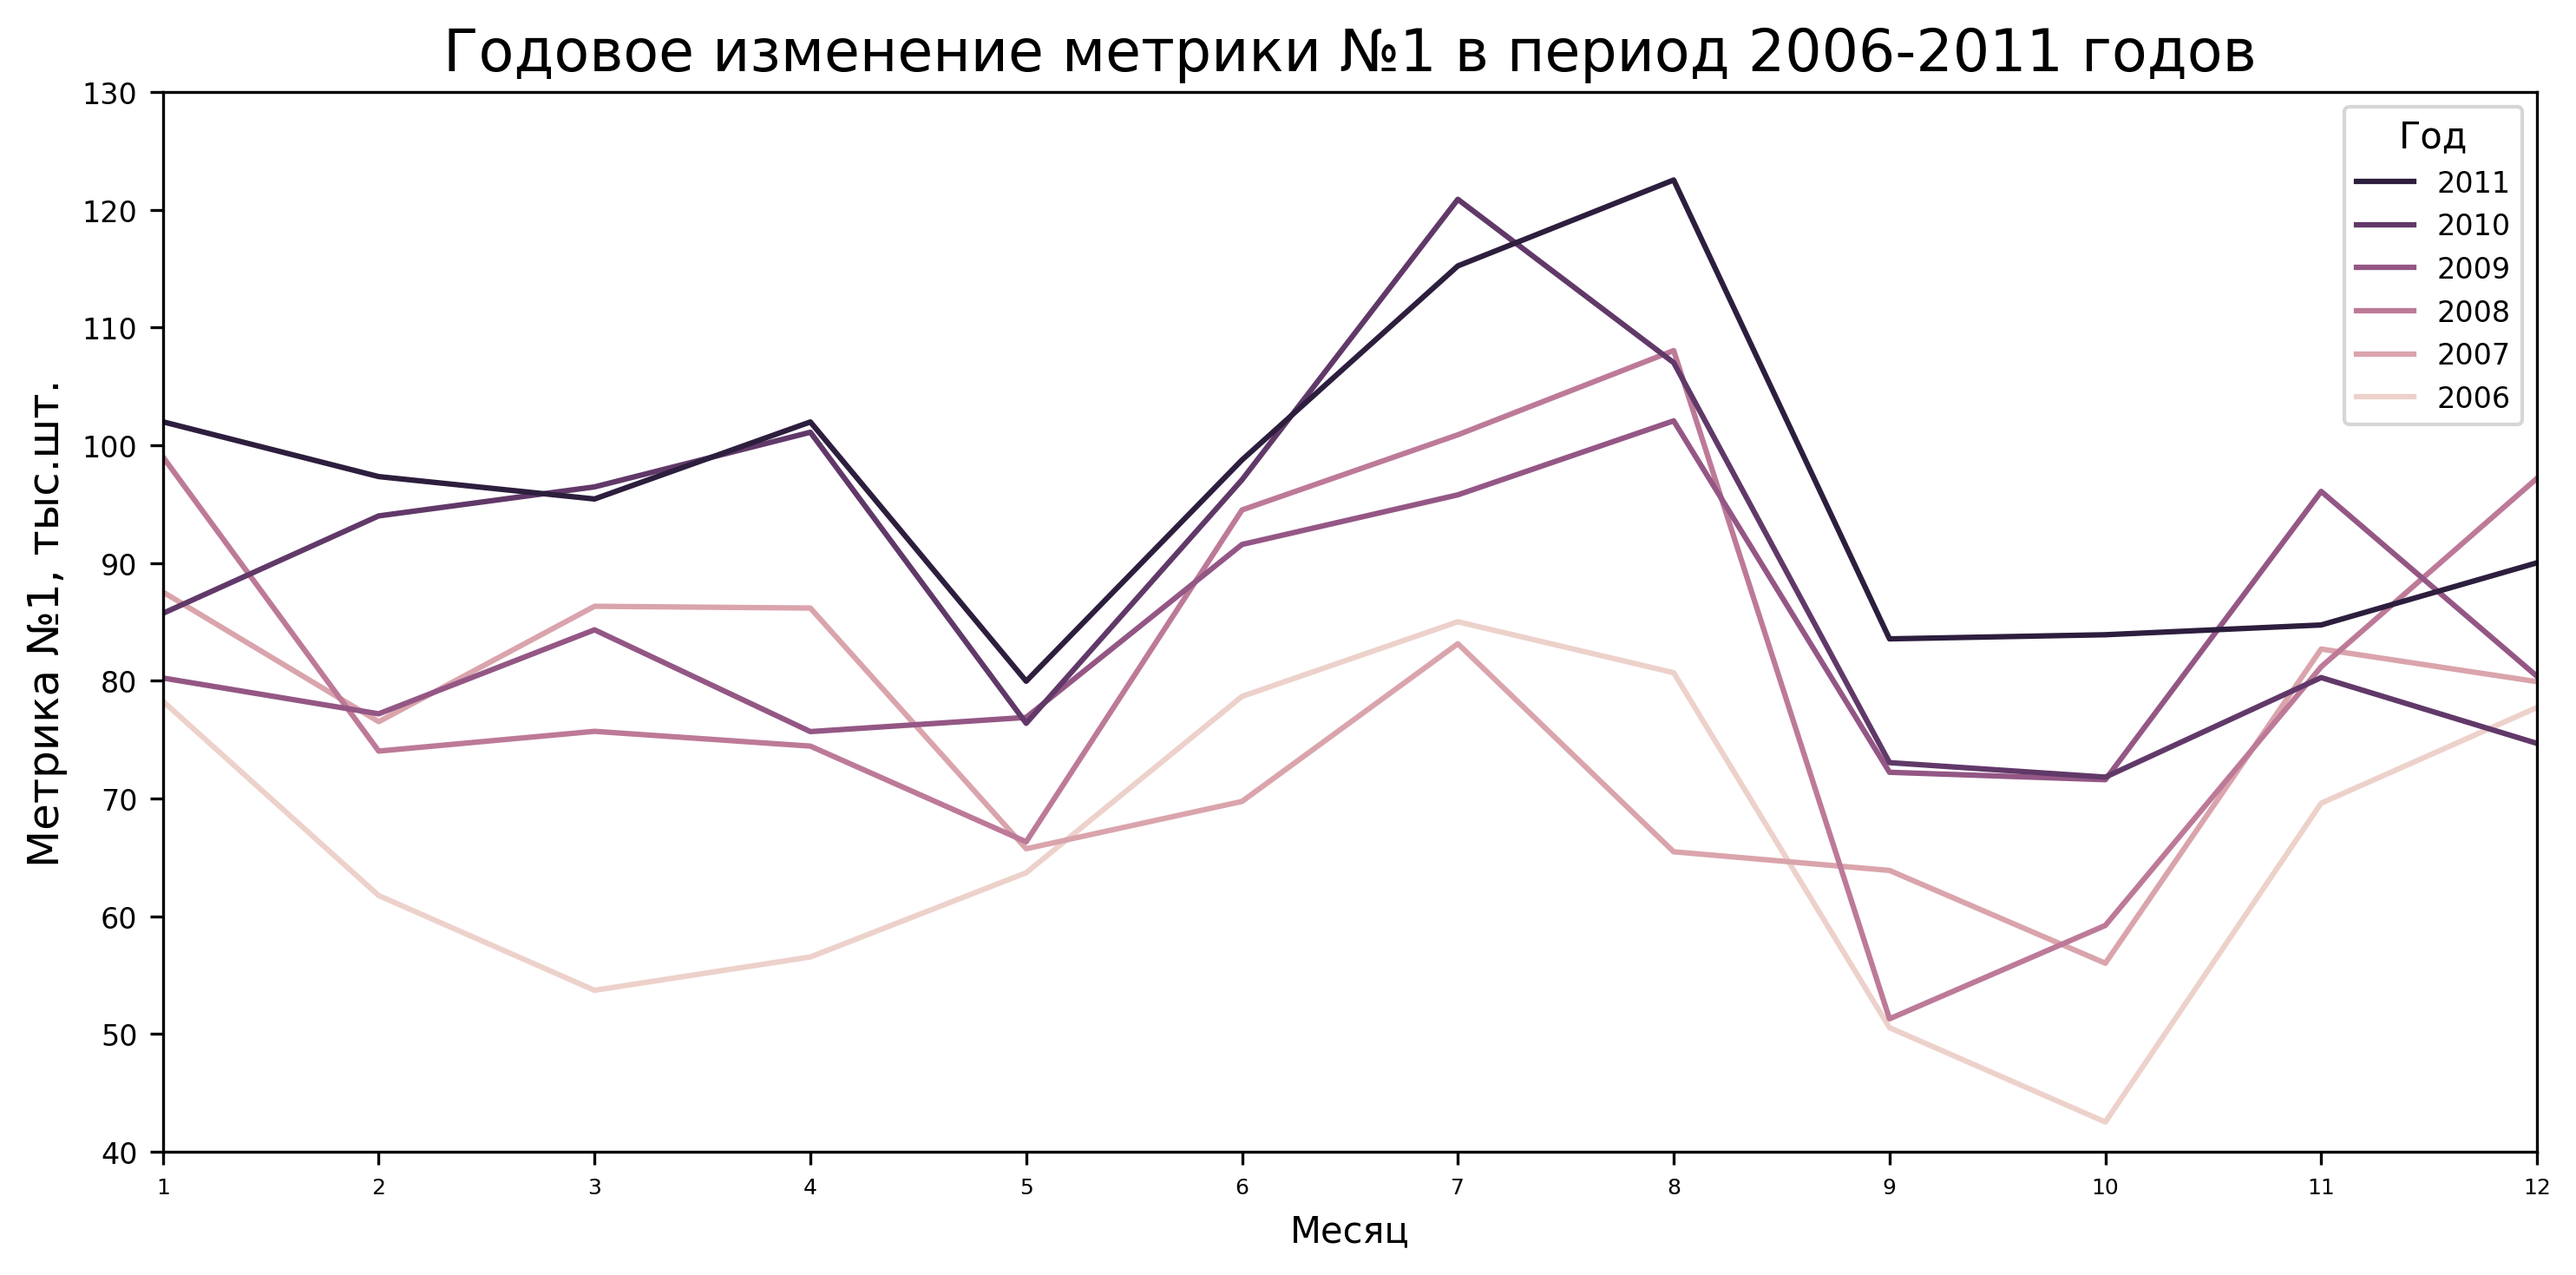

In [8]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_data, x='month', y='metrics1', hue='year') # Отрисуем график

x_unique = df_data.month.unique()
plt.xticks(ticks=x_unique, fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(x_unique.min(), x_unique.max()) # Ограничим ось абсцисс
plt.xlabel('Месяц', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Годовое изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
handles, labels = plt.gca().get_legend_handles_labels() # Получим данные легенды
plt.legend(handles[::-1], labels[::-1], title='Год', loc='upper right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_gradient_advanced.png') # Сохраним график

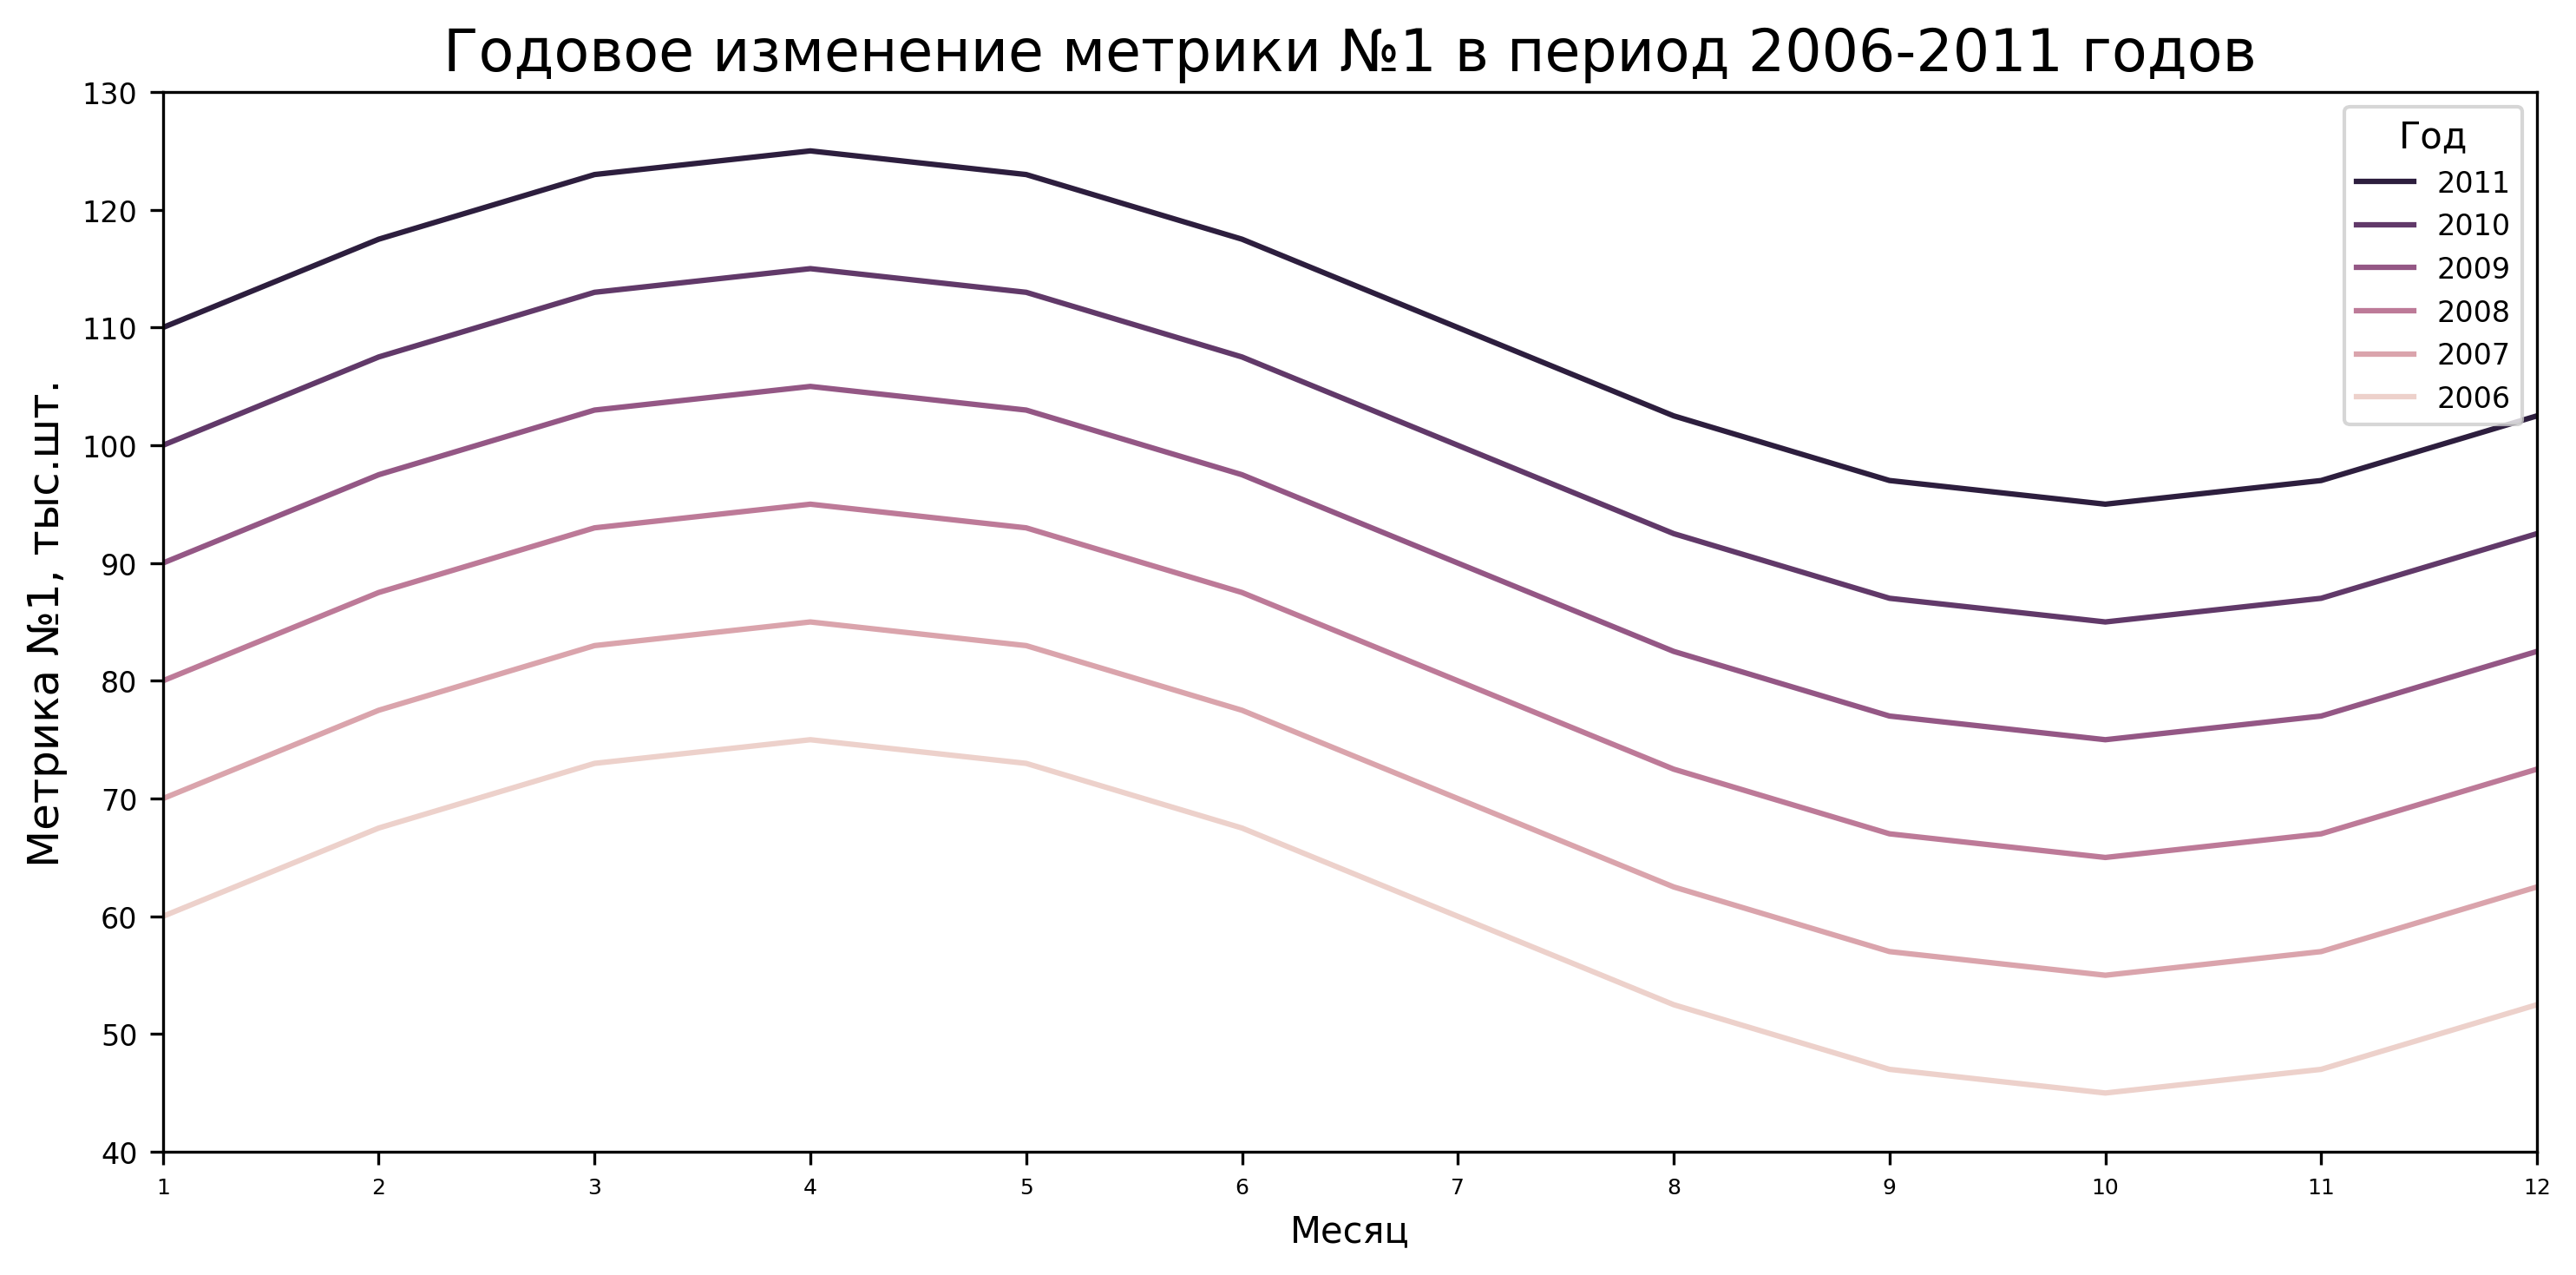

In [9]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_sin, x='month', y='metrics1', hue='year') # Отрисуем график

x_unique = df_sin.month.unique()
plt.xticks(ticks=x_unique, fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(x_unique.min(), x_unique.max()) # Ограничим ось абсцисс
plt.xlabel('Месяц', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Годовое изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
handles, labels = plt.gca().get_legend_handles_labels() # Получим данные легенды
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles, labels, title='Год', loc='upper right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_vacuum.png') # Сохраним график

### Дискретная палитра

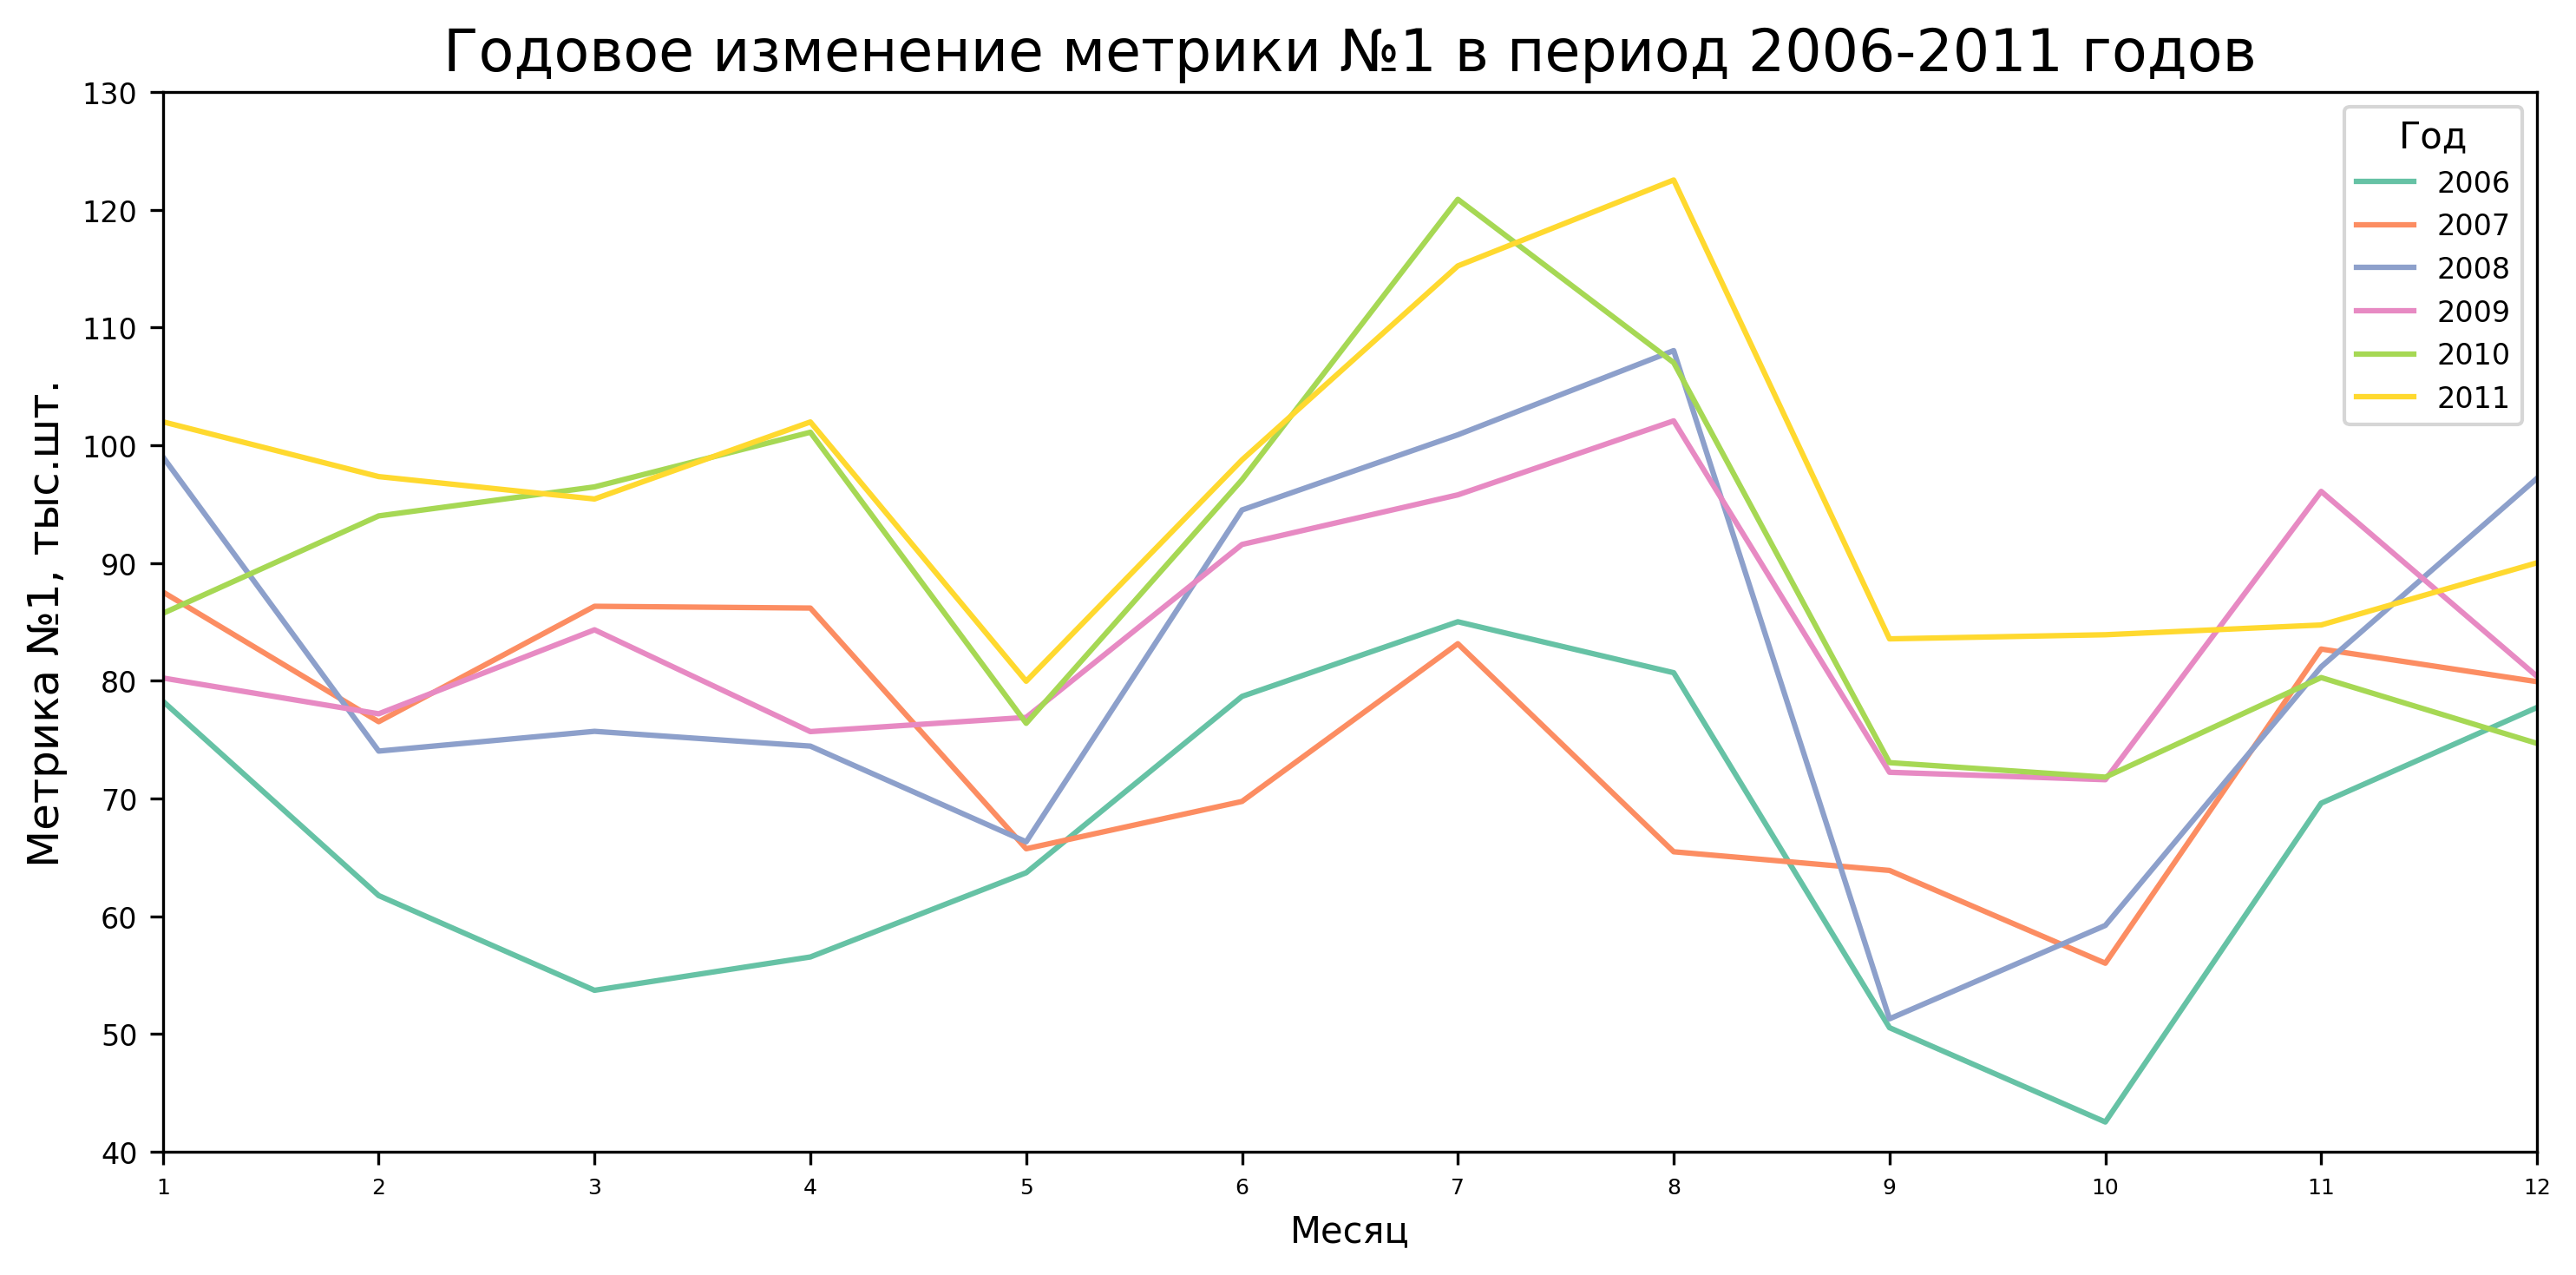

In [10]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_data, x='month', y='metrics1', hue='year', palette='Set2') # Отрисуем график

x_unique = df_data.month.unique()
plt.xticks(ticks=x_unique, fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(x_unique.min(), x_unique.max()) # Ограничим ось абсцисс
plt.xlabel('Месяц', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Годовое изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
plt.legend(title='Год', loc='upper right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_discrete.png') # Сохраним график

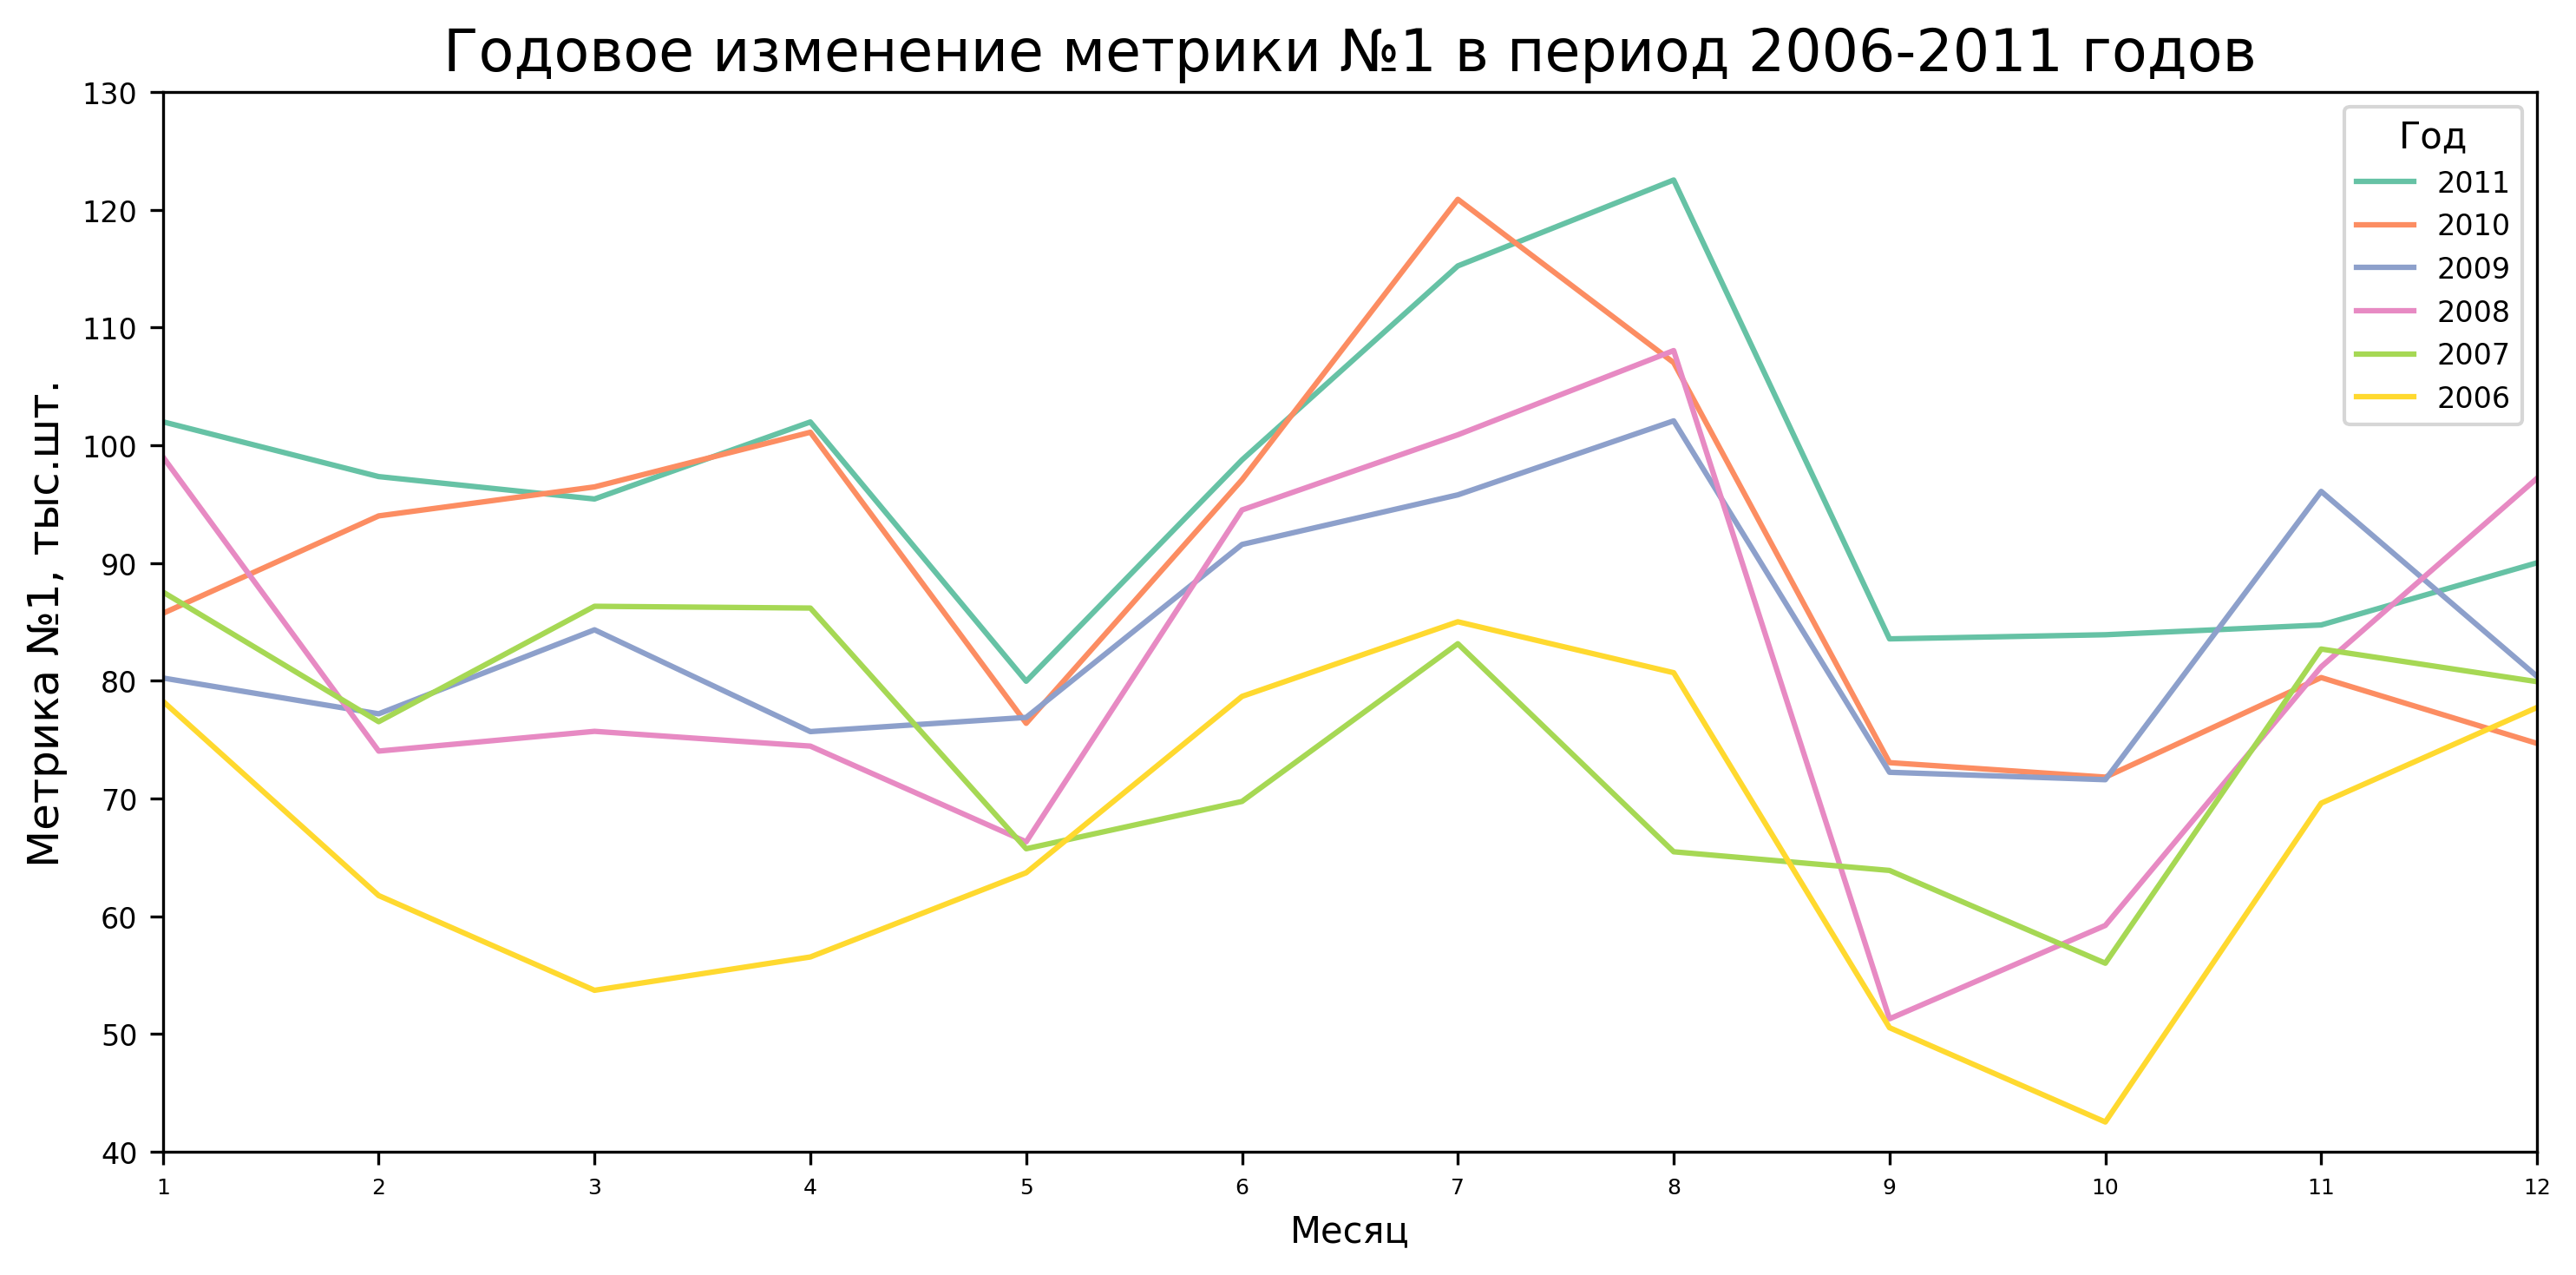

In [11]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_data, x='month', y='metrics1', hue='year', palette='Set2', hue_order=df_data.year.unique()[::-1]) # Отрисуем график

x_unique = df_data.month.unique()
plt.xticks(ticks=x_unique, fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(x_unique.min(), x_unique.max()) # Ограничим ось абсцисс
plt.xlabel('Месяц', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.legend(title='Год', loc='upper right', fontsize=8) # Укажем название и положение легенды
plt.title('Годовое изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_discrete_advanced.png') # Сохраним график

### Комбинированная палитра

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_data, x='month', y='metrics1', hue='year', palette='tab20b', alpha=0.7, hue_order=df_data.year.unique()[::-1]) # Отрисуем график

x_unique = df_data.month.unique()
plt.xticks(ticks=x_unique, fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(x_unique.min(), x_unique.max()) # Ограничим ось абсцисс
plt.xlabel('Месяц', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Годовое изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
plt.legend(title='Год', loc='upper right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_combine.png') # Сохраним график

In [ ]:
def calculate_rgb(
    rgb: tuple((int, int, int)),
    opacity: float,
) -> [float, float, float, float]:
    """
    Функция получает на вход RGB палитру в виде чисел 0-255, а также уровень непрозрачности в диапазоне 0-1.
    Возвращает список из четырех чисел. Первые три числа - RGB, пересчитанные для seaborn. Последнее число - уровень непрозрачности.
    """
    return [i/255 for i in rgb] + [opacity]

def make_palette(
    rgb_tuple: tuple((int, int, int)),
    opacity_tuple: tuple((float, float)),
    elem_numbers: int,
) -> [list]:
    """
    Функция получает на вход числа RGB, диапазон непрозрачности и количество элементов, которые нужно сгенерировать.
    Возвращает список элементов (списков) согласно задааному количеству элементов.
    """
    return [calculate_rgb(rgb_tuple, o) for o in np.linspace(opacity_tuple[0], opacity_tuple[1], elem_numbers)]

# make_palette((R, G, B), (opacity_max, opacity_min), element_numbers)
own_palette = make_palette((200, 50, 50), (1.0, 1.0), 1) + make_palette((50, 50, 200), (0.7, 0.3), 3) + make_palette((200, 200, 200), (0.8, 0.3), 2)

plt.figure(figsize=(5,1), dpi=300)
sns.barplot(data=[[1]]*6, palette=own_palette)
asd = plt.gca().patches
for w,o in zip(plt.gca().patches, own_palette):
    w.set_width(1.0)
    w.set_alpha(o[-1])
plt.axis('off')
plt.tight_layout()

if is_save_graph: plt.savefig(f'{path_graphs}plot_personal_palette.png')

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.lineplot(data=df_predict, x='month', y='metrics1', hue='year', palette=own_palette, hue_order=df_predict.year.unique()[::-1]) # Отрисуем график

x_unique = df_predict.month.unique()
plt.xticks(ticks=x_unique, fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(x_unique.min(), x_unique.max()) # Ограничим ось абсцисс
plt.xlabel('Месяц', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Годовое изменение метрики №1 в период 2006-2011 годов', fontsize=16) # Изменим название графика
plt.legend(title='Год', loc='upper right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_combine_advanced.png') # Сохраним график

## Вместо 3D графкиов

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.scatterplot(data=df_data3d, x='metrics2', y='metrics1', color='orange') # Отрисуем график

x_ticks, x_label = plt.xticks() # Получим индексы и подписи оси ординат
plt.xticks(ticks=x_ticks, labels=['{:.1f}'.format(i) for i in x_ticks/10**6], fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(0.1*10**6, 1*10**6) # Ограничим ось абсцисс
plt.xlabel('Метрика №2, млн.шт.', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Зависимость метрики №1 от метрики №2', fontsize=16) # Изменим название графика
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_3d.png') # Сохраним график

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.scatterplot(data=df_data3d, x='metrics2', y='metrics1', color='orange', alpha=0.6) # Отрисуем график

x_ticks, x_label = plt.xticks() # Получим индексы и подписи оси ординат
plt.xticks(ticks=x_ticks, labels=['{:.1f}'.format(i) for i in x_ticks/10**6], fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(0.1*10**6, 1*10**6) # Ограничим ось абсцисс
plt.xlabel('Метрика №2, млн.шт.', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Зависимость метрики №1 от метрики №2', fontsize=16) # Изменим название графика
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_3d_opacity.png') # Сохраним график

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.scatterplot(data=df_data3d, x='metrics2', y='metrics1', size='metrics3', color='orange', alpha=0.8) # Отрисуем график

x_ticks, x_label = plt.xticks() # Получим индексы и подписи оси ординат
plt.xticks(ticks=x_ticks, labels=['{:.1f}'.format(i) for i in x_ticks/10**6], fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(0.1*10**6, 1*10**6) # Ограничим ось абсцисс
plt.xlabel('Метрика №2, млн.шт.', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Зависимость метрики №1 от метрики №2', fontsize=16) # Изменим название графика
legend_handles, legend_labels = plt.gca().get_legend_handles_labels() # Получим индексы и подписи оси ординат
for l in legend_handles: # Поправим цвет и непрозрачность подписей в легенде
    l.set_color('orange')
    l.set_alpha(0.8)
legend_labels = ['{:.0f}'.format(float(l)*100) for l in legend_labels] # Изменим подписи легенды
plt.legend(legend_handles, legend_labels, title='Метрика №3, млн.шт.', loc='lower right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_3d_size.png') # Сохраним график

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.scatterplot(data=df_data3d, x='metrics2', y='metrics1', size='metrics3', sizes=(10, 150), color='orange', alpha=0.8) # Отрисуем график

x_ticks, x_label = plt.xticks() # Получим индексы и подписи оси ординат
plt.xticks(ticks=x_ticks, labels=['{:.1f}'.format(i) for i in x_ticks/10**6], fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(0.1*10**6, 1*10**6) # Ограничим ось абсцисс
plt.xlabel('Метрика №2, млн.шт.', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Зависимость метрики №1 от метрики №2', fontsize=16) # Изменим название графика
legend_handles, legend_labels = plt.gca().get_legend_handles_labels() # Получим индексы и подписи оси ординат
for l in legend_handles: # Поправим цвет и непрозрачность подписей в легенде
    l.set_color('orange')
    l.set_alpha(0.8)
legend_labels = ['{:.0f}'.format(float(l)*100) for l in legend_labels] # Изменим подписи легенды
plt.legend(legend_handles, legend_labels, title='Метрика №3, млн.шт.', loc='lower right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_3d_size_range.png') # Сохраним график

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.scatterplot(data=df_data3d, x='metrics2', y='metrics1', hue='metrics3') # Отрисуем график

x_ticks, x_label = plt.xticks() # Получим индексы и подписи оси ординат
plt.xticks(ticks=x_ticks, labels=['{:.1f}'.format(i) for i in x_ticks/10**6], fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(0.1*10**6, 1*10**6) # Ограничим ось абсцисс
plt.xlabel('Метрика №2, млн.шт.', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Зависимость метрики №1 от метрики №2', fontsize=16) # Изменим название графика
legend_handles, legend_labels = plt.gca().get_legend_handles_labels() # Получим индексы и подписи оси ординат
legend_labels = ['{:.0f}'.format(float(l)*100) for l in legend_labels] # Изменим подписи легенды
plt.legend(legend_handles, legend_labels, title='Метрика №3, млн.шт.', loc='lower right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_3d_hue.png') # Сохраним график

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.scatterplot(data=df_predict, x='metrics2', y='metrics1', hue='year', hue_order=df_predict.year.unique()[::-1], palette=own_palette) # Отрисуем график

x_ticks, x_label = plt.xticks() # Получим индексы и подписи оси ординат
plt.xticks(ticks=x_ticks, labels=['{:.1f}'.format(i) for i in x_ticks/10**6], fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(0.1*10**6, 1*10**6) # Ограничим ось абсцисс
plt.xlabel('Метрика №2, млн.шт.', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Зависимость метрики №1 от метрики №2', fontsize=16) # Изменим название графика
plt.legend(title='Год', loc='lower right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_3d_palette.png') # Сохраним график

In [ ]:
plt.figure(figsize=(10,5), dpi=300) # Изменим размер подложки графика и качество

sns.scatterplot(
    data=df_predict, x='metrics2', y='metrics1', hue='year', hue_order=df_predict.year.unique()[::-1], palette=own_palette,
    size='metrics3', sizes=(10, 150),
) # Отрисуем график

x_ticks, x_label = plt.xticks() # Получим индексы и подписи оси ординат
plt.xticks(ticks=x_ticks, labels=['{:.1f}'.format(i) for i in x_ticks/10**6], fontsize=6) # Изменим подписи делений оси абсцисс
plt.xlim(0.1*10**6, 1*10**6) # Ограничим ось абсцисс
plt.xlabel('Метрика №2, млн.шт.', fontsize=10) # Изменим подпись оси абсцисс

y_ticks, y_label = plt.yticks() # Получим индексы и подписи оси ординат
plt.yticks(ticks=y_ticks, labels=['{:.0f}'.format(i) for i in y_ticks/10**3], fontsize=8) # Изменим подписи делений оси ординат
plt.ylim(4*10**4, 13*10**4) # Ограничим ось ординат
plt.ylabel('Метрика №1, тыс.шт.', fontsize=12) # Изменим подпись оси ординат

plt.title('Зависимость метрики №1 от метрики №2', fontsize=16) # Изменим название графика
legend_handles, legend_labels = plt.gca().get_legend_handles_labels() # Получим индексы и подписи оси ординат
# Изменим подписи легенды
legend_labels[0] = 'Год'
legend_labels[7] = 'Метрика №3, млн.шт.'
legend_labels[8:] = ['{:.0f}'.format(float(l)*100) for l in legend_labels[8:]]
plt.legend(legend_handles, legend_labels, loc='lower right', fontsize=8) # Укажем название и положение легенды и порядок категорий
plt.tight_layout() # Растянем график на всю подложку

if is_save_graph: plt.savefig(f'{path_graphs}plot_3d_palette_size.png') # Сохраним график